In [1]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k # in case I miss any methods I want to use

Using TensorFlow backend.


In [3]:
#load the data 
from google.colab import files #Only use for Google Colab
uploaded = files.upload()      #Only use for Google Colab
df = pd.read_csv("heart.csv")
    
#Print the first 5 rows
df.head()

Saving heart.csv to heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Get the shape of the data (the number of rows & columns)
df.shape

(303, 14)

In [0]:
#Create a list of columns to retain
columns_to_retain = ["cp", "chol", "fbs", "restecg",
                         "thalach", "slope", "ca", "thal", "target"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [7]:
#Print / show the first 5 rows of the new cleaned data set
df.head()

,cp,chol,fbs,restecg,thalach,slope,ca,thal,target
0,3,233,1,0,150,0,0,1,1
1,2,250,0,1,187,0,0,2,1
2,1,204,0,0,172,2,0,2,1
3,1,236,0,1,178,2,0,2,1
4,0,354,0,1,163,2,0,2,1


In [0]:
#Split the data into independent'X'(the features) and dependent 'y' variables (the target)
X = df.drop(["target"], axis=1)
y = df["target"]

In [0]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [0]:
#Split the data into 80% training and 20% testing & Shuffle the data before splitting
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=True)

In [14]:
# Build The model
#  The models input shape/dimensions is the number of features/columns in the data set
#  The model will have 2 layers:
#      (i) The first with 256 neurons and the ReLu activation function & a initializer which 
#          defines the way to set the initial random weights of the Keras layers. 
#          We'll use a initializer that generates tensors with a normal distribution.
#     (ii) The other layer will have 1 neuron with the activation function 'hard_sigmoid'
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

W0905 11:18:12.125319 140171825653632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 11:18:12.186297 140171825653632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 11:18:12.197756 140171825653632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0905 11:18:12.222134 140171825653632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
#Compile the model
# Loss measuers how well the model did on training , and then tries to improve on it using the optimizer.
# The loss function we will use is binary_crossentropy for binary (2) classes.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0905 11:19:34.313715 140171825653632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 11:19:34.351057 140171825653632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0905 11:19:34.359094 140171825653632 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
#Train the model
history = model.fit(X_train, y_train, 
epochs=2000, #The number of iterations over the entire dataset to train on
batch_size=X_train.shape[0]) #The number of samples per gradient update for training

Epoch 1/2000
242/242 [==============================] - 1s 3ms/step - loss: 0.7034 - acc: 0.4421
Epoch 2/2000
242/242 [==============================] - 0s 17us/step - loss: 0.6986 - acc: 0.4463
Epoch 3/2000
242/242 [==============================] - 0s 23us/step - loss: 0.6934 - acc: 0.4711
Epoch 4/2000
242/242 [==============================] - 0s 24us/step - loss: 0.6882 - acc: 0.5785
Epoch 5/2000
242/242 [==============================] - 0s 23us/step - loss: 0.6831 - acc: 0.7479
Epoch 6/2000
242/242 [==============================] - 0s 23us/step - loss: 0.6782 - acc: 0.7645
Epoch 7/2000
242/242 [==============================] - 0s 23us/step - loss: 0.6736 - acc: 0.6694
Epoch 8/2000
242/242 [==============================] - 0s 23us/step - loss: 0.6691 - acc: 0.5992
Epoch 9/2000
242/242 [==============================] - 0s 21us/step - loss: 0.6649 - acc: 0.5868
Epoch 10/2000
242/242 [==============================] - 0s 14us/step - loss: 0.6608 - acc: 0.5785
Epoch 11/2000
242/24

In [0]:
#Save the model
model.save("ckd.model")

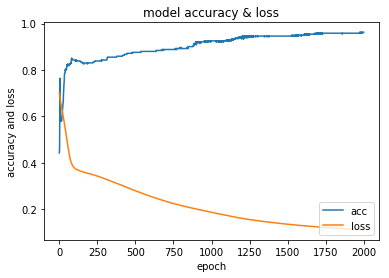

In [18]:
#Visualize the models accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [19]:
#Print the shape of the training and testing data
print("-------------------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
Shape of training data:  (242, 8)
Shape of test data    :  (61, 8)
-------------------------------------------------------------------


In [20]:
#Loop through any and all saved models. Then get each models accuracy, loss, prediction and original values on the test data.
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("-------------------------------------------------------------------")
  print()

Model file:  ckd.model
61/61 [==============================] - 0s 802us/step

Original  : 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1

Predicted : 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1

Scores    : loss =  1.8840263749732347  acc =  0.737704906307283
-------------------------------------------------------------------

